In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, brier_score_loss, precision_score, log_loss, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)  # Set to display all columns of dataframes

In [34]:
df = pd.read_csv('train.csv')

df[['Deck','CabinNumber','Side']] = df['Cabin'].str.split('/',expand=True)
df[['GroupNumber','IDNumber']] = df['PassengerId'].str.split('_',expand=True)
df.set_index(['GroupNumber','IDNumber'])
df.drop(columns=['PassengerId','Cabin'],inplace=True)
df[['GroupNumber','IDNumber']] = df[['GroupNumber','IDNumber']].astype(int)
df.dropna(axis=0,subset=['Deck','CabinNumber','Side'],inplace=True)
df['CabinNumber'] = df['CabinNumber'].astype(int)
df = df[['GroupNumber','IDNumber','Side','Deck','CabinNumber','HomePlanet','CryoSleep','Destination','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Age','Name','Transported']]
categorical_columns = ['HomePlanet','CryoSleep','Destination','VIP','Name']
numerical_columns = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

df[categorical_columns]=df[categorical_columns].fillna('unknown')
df[numerical_columns]=df[numerical_columns].fillna(float(0))
df = pd.get_dummies(data=df,columns=['HomePlanet','CryoSleep','Destination','VIP','Deck','Side'])
X = df.drop(columns=['Transported','Name'],axis=1)
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=831)
X1 = X.drop(columns=['VIP_unknown','VIP_True','CryoSleep_True','Side_S','Destination_TRAPPIST-1e'],axis=1)
X1_train, X1_test, y_train, y_test = train_test_split(X1,y,test_size=.2,random_state=818)

In [7]:
X_train

,GroupNumber,IDNumber,CabinNumber,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_unknown,CryoSleep_False,CryoSleep_True,CryoSleep_unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_unknown,VIP_False,VIP_True,VIP_unknown,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
7694,8210,1,241,1282.0,0.0,5.0,495.0,0.0,47.0,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True
6106,6447,1,1043,0.0,0.0,0.0,0.0,0.0,38.0,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
2739,2942,1,558,198.0,44.0,97.0,30.0,510.0,35.0,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True
6687,7052,1,469,0.0,0.0,0.0,0.0,0.0,27.0,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2183,2338,1,376,0.0,0.0,0.0,0.0,0.0,27.0,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,1402,2,215,0.0,0.0,0.0,0.0,0.0,33.0,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
2002,2137,3,423,0.0,0.0,0.0,0.0,0.0,4.0,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False
735,772,1,56,0.0,16.0,325.0,4476.0,1359.0,37.0,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
3166,3413,1,559,0.0,0.0,0.0,0.0,0.0,27.0,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False


In [8]:
X1_train

,GroupNumber,IDNumber,CabinNumber,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_unknown,CryoSleep_False,CryoSleep_unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_unknown,VIP_False,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P
7694,8210,1,241,1282.0,0.0,5.0,495.0,0.0,47.0,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False
6106,6447,1,1043,0.0,0.0,0.0,0.0,0.0,38.0,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True
2739,2942,1,558,198.0,44.0,97.0,30.0,510.0,35.0,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
6687,7052,1,469,0.0,0.0,0.0,0.0,0.0,27.0,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False
2183,2338,1,376,0.0,0.0,0.0,0.0,0.0,27.0,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,1402,2,215,0.0,0.0,0.0,0.0,0.0,33.0,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False
2002,2137,3,423,0.0,0.0,0.0,0.0,0.0,4.0,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,True
735,772,1,56,0.0,16.0,325.0,4476.0,1359.0,37.0,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False
3166,3413,1,559,0.0,0.0,0.0,0.0,0.0,27.0,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True


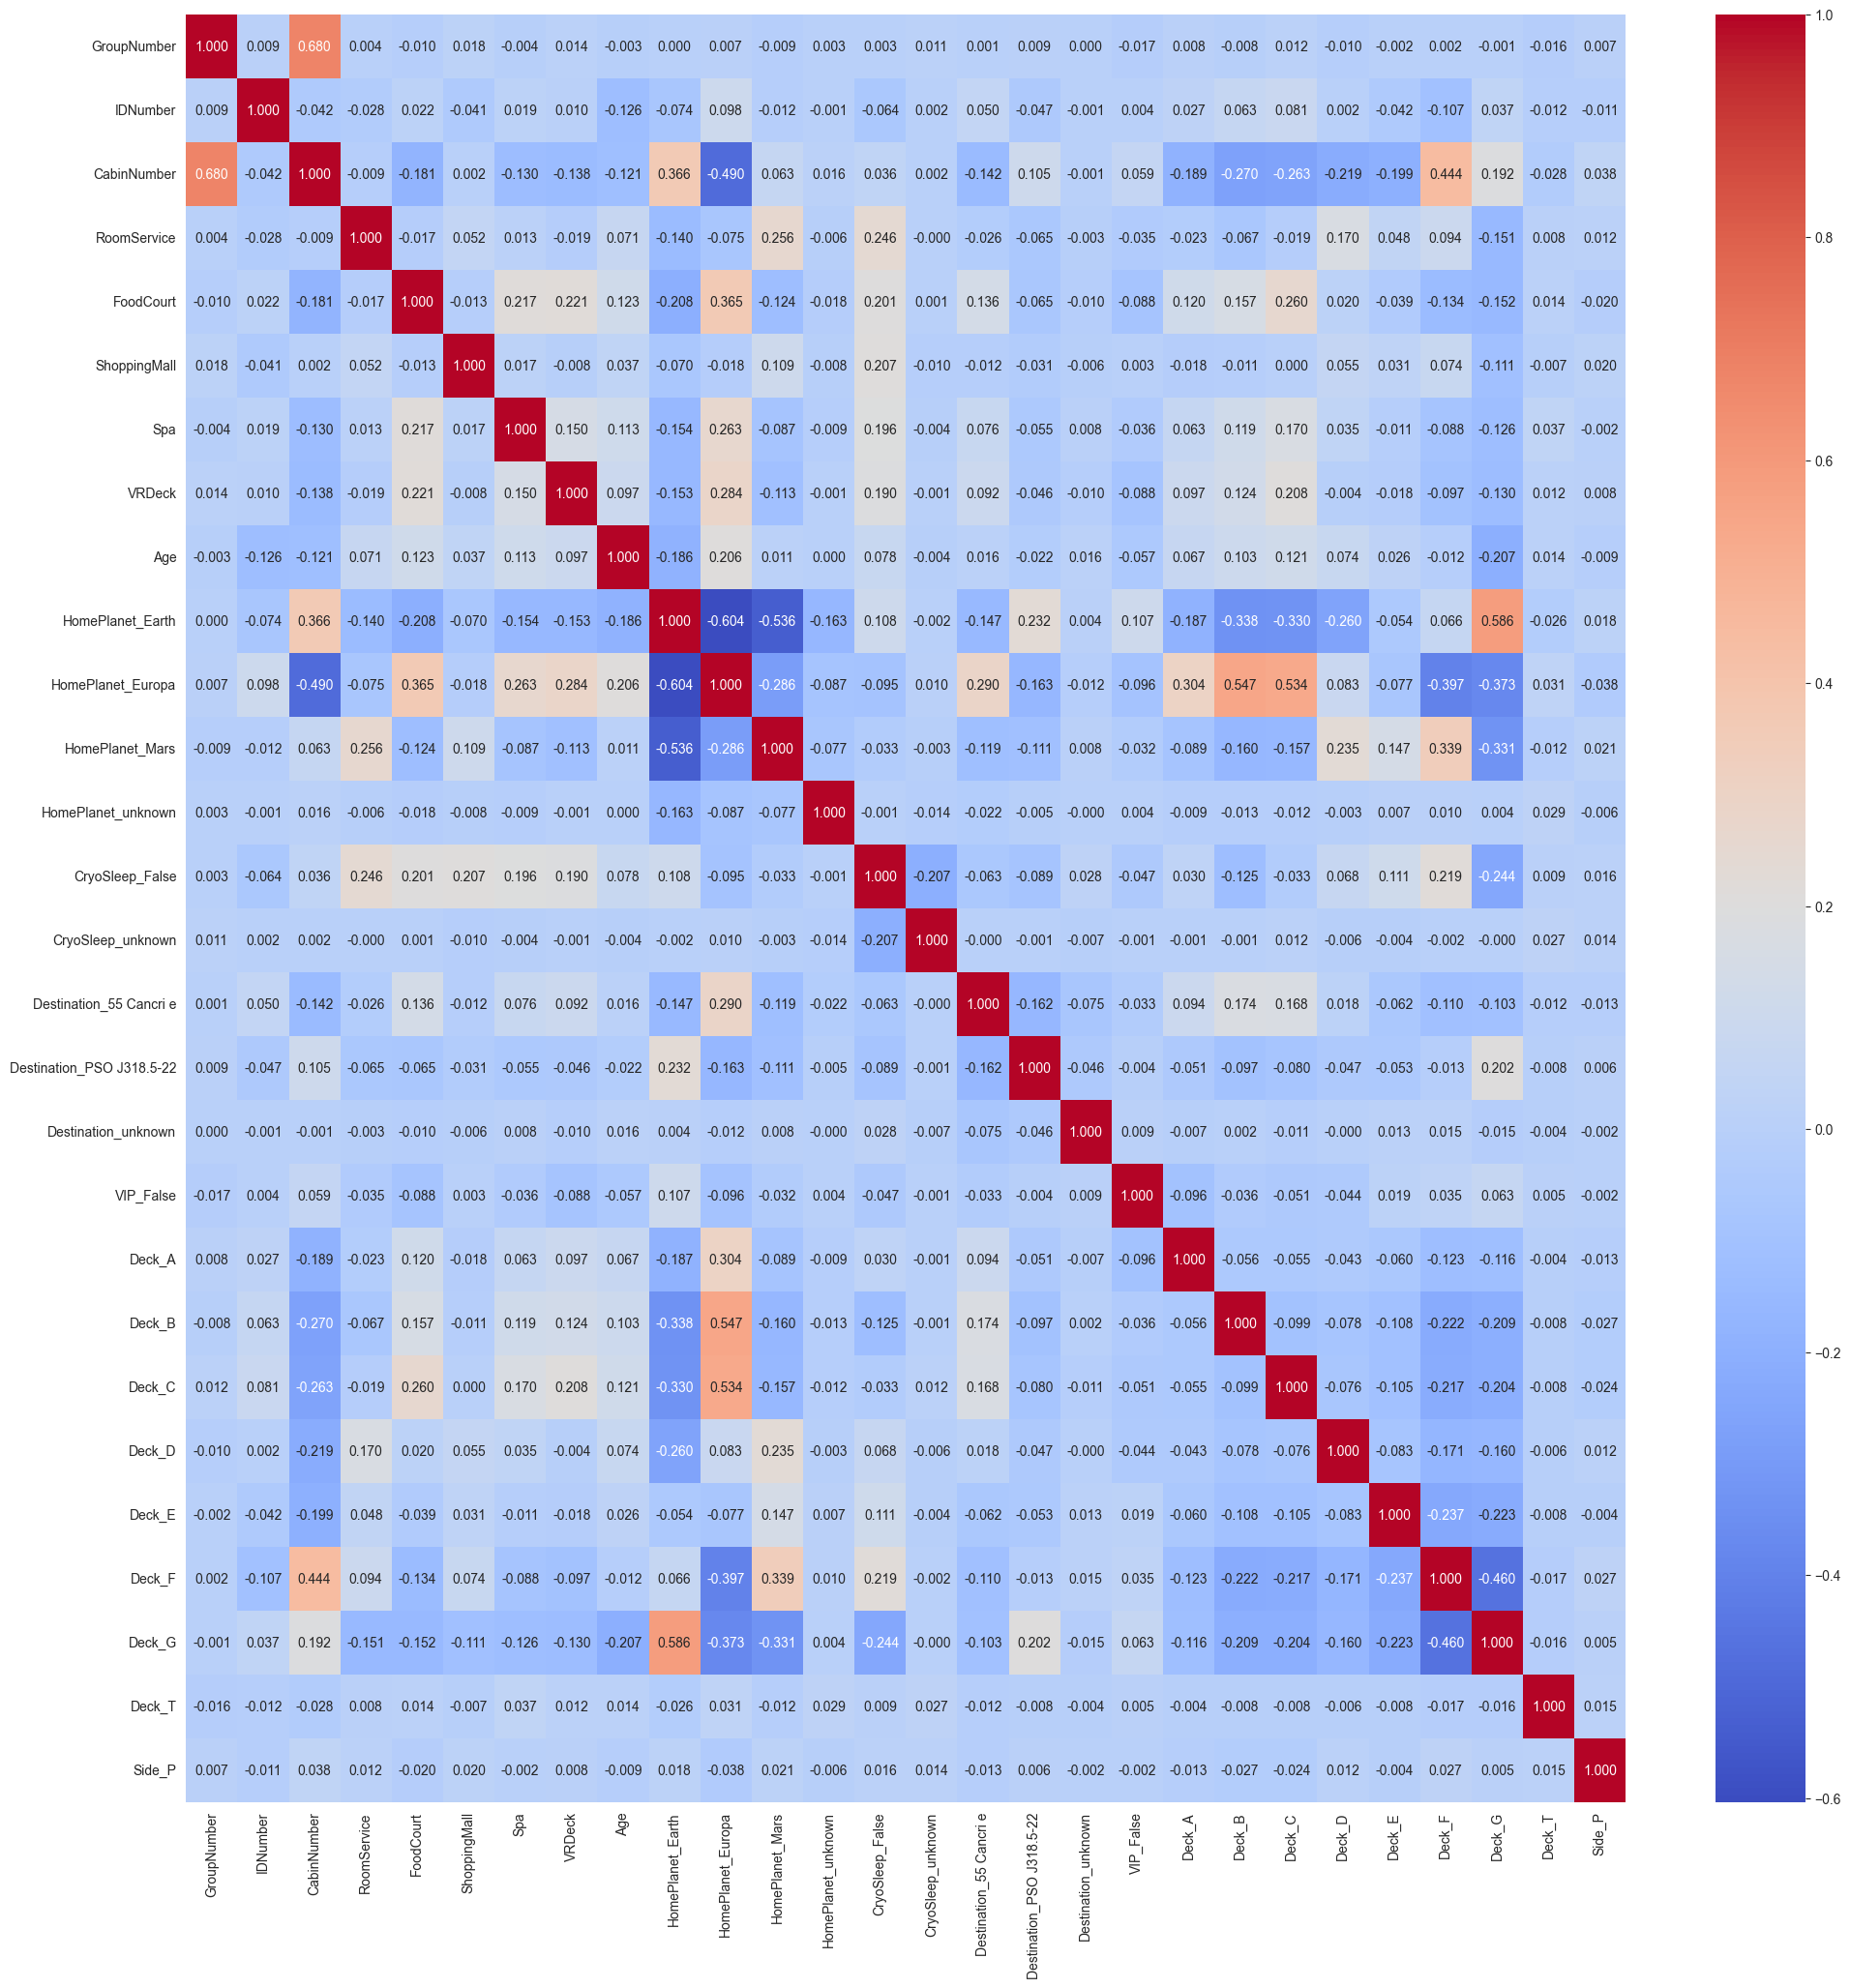

In [9]:
plt.figure(figsize=(24,24))
sns.heatmap(X1.corr(),cmap='coolwarm',annot=True,fmt=".3f")
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Accuracy: 0.7775161859917599

Precision: 0.755750273822563

Recall: 0.8165680473372781

F1-Score: 0.7849829351535836


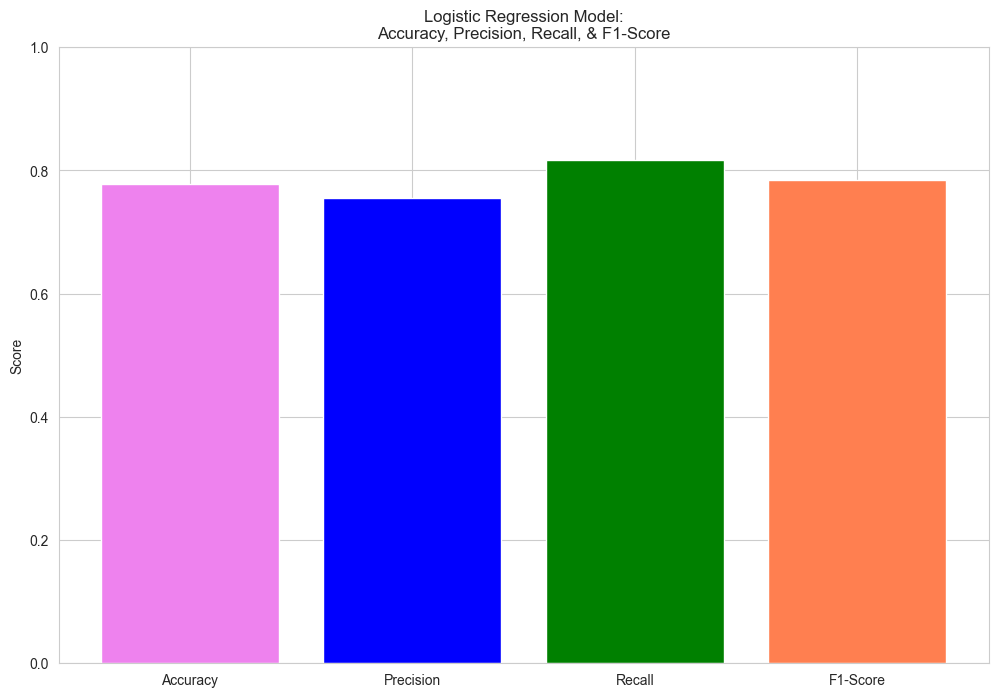

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_log = logreg.predict(X_test)

log_accuracy = accuracy_score(y_test,y_pred_log)
log_precision = precision_score(y_test,y_pred_log)
log_recall = recall_score(y_test,y_pred_log)
log_f1 = f1_score(y_test,y_pred_log)

print(f"Accuracy: {log_accuracy}")
print(f"\nPrecision: {log_precision}")
print(f"\nRecall: {log_recall}")
print(f"\nF1-Score: {log_f1}")

log_metrics = ['Accuracy',"Precision",'Recall','F1-Score']
log_scores = [log_accuracy,log_precision,log_recall,log_f1]

plt.figure(figsize=(12,8))
plt.bar(log_metrics,log_scores,color=['violet','blue','green','coral'])
plt.ylim(0,1)
plt.ylabel('Score')
plt.title("Logistic Regression Model:\nAccuracy, Precision, Recall, & F1-Score")
plt.show()

Accuracy: 0.7775161859917599

Precision: 0.755750273822563

Recall: 0.8165680473372781

F1-Score: 0.7849829351535836


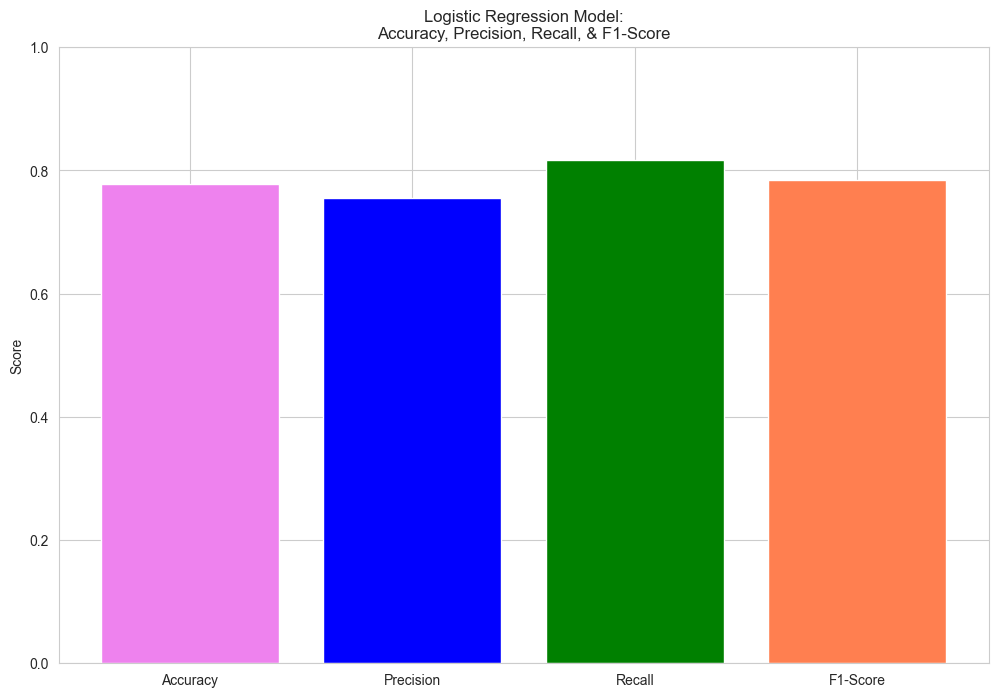

In [20]:
scaler1 = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

logreg1 = LogisticRegression()
logreg1.fit(X1_train,y_train)

y_pred_log1 = logreg1.predict(X1_test)

log1_accuracy = accuracy_score(y_test,y_pred_log1)
log1_precision = precision_score(y_test,y_pred_log1)
log1_recall = recall_score(y_test,y_pred_log1)
log1_f1 = f1_score(y_test,y_pred_log1)

print(f"Accuracy: {log1_accuracy}")
print(f"\nPrecision: {log1_precision}")
print(f"\nRecall: {log1_recall}")
print(f"\nF1-Score: {log1_f1}")

log1_metrics = ['Accuracy',"Precision",'Recall','F1-Score']
log1_scores = [log1_accuracy,log1_precision,log1_recall,log1_f1]

plt.figure(figsize=(12,8))
plt.bar(log1_metrics,log1_scores,color=['violet','blue','green','coral'])
plt.ylim(0,1)
plt.ylabel('Score')
plt.title("Logistic Regression Model:\nAccuracy, Precision, Recall, & F1-Score")
plt.show()

The metrics are exactly the same when we remove the columns with high correlation implying that we haven't lost any ionformation by removing those columns

[ 0.09017279  0.01518043  0.00312023 -0.92408519  0.8269318   0.27300883
 -2.27206095 -2.2024376  -0.14286474 -0.32156354  0.43197705 -0.04384965
 -0.04843002 -0.33393134  0.35546173 -0.04911641  0.12644394 -0.05068383
 -0.08637057  0.02682041  0.00562374 -0.01140732  0.00341016 -0.13234459
  0.13280321  0.41844843 -0.02670002 -0.18906865  0.01475539 -0.16791786
  0.00272184 -0.15440487  0.15440487]

Index(['GroupNumber', 'IDNumber', 'CabinNumber', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Age', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_unknown',
       'CryoSleep_False', 'CryoSleep_True', 'CryoSleep_unknown',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Destination_unknown', 'VIP_False',
       'VIP_True', 'VIP_unknown', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P', 'Side_S'],
      dtype='object')


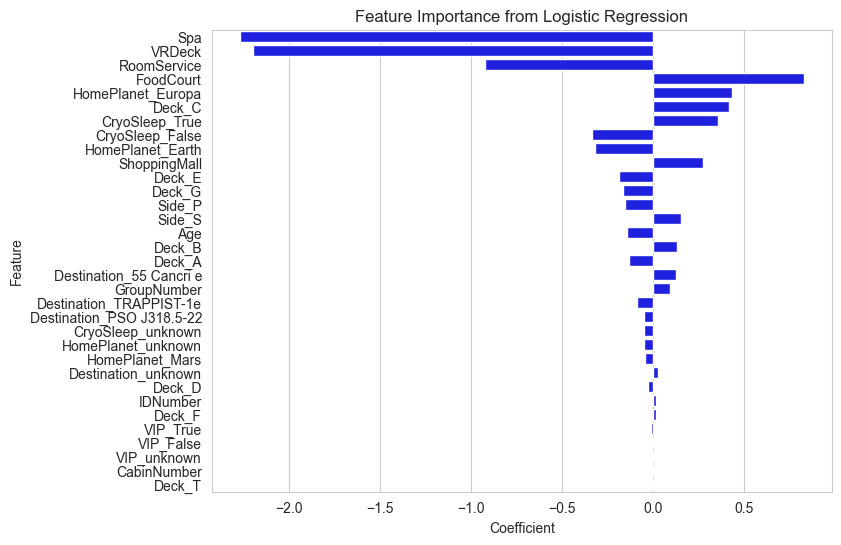

In [18]:
log_coefficients = logreg.coef_.flatten()
log_feature_names = X.columns
print(log_coefficients)
print()
print(log_feature_names)

log_feature_importance_df = pd.DataFrame({'Feature':log_feature_names, 'Coefficient':log_coefficients})
log_feature_importance_df = log_feature_importance_df.reindex(log_feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient',y='Feature',data=log_feature_importance_df,color='b')
plt.title('Feature Importance from Logistic Regression')
plt.show()

In [19]:
print(len(log_feature_names))
print(len(log_coefficients))

33
33


[ 0.09035506  0.01551325  0.00322734 -0.92240117  0.82313384  0.27264252
 -2.26765235 -2.19782552 -0.14285772 -0.32134     0.4325249  -0.04472674
 -0.04839087 -0.69494461 -0.16561359  0.2012555   0.0027349   0.05366154
  0.00794402 -0.13246981  0.13341047  0.41732097 -0.02785098 -0.18883214
  0.01491623 -0.16729931  0.00265987 -0.30850335]

Index(['GroupNumber', 'IDNumber', 'CabinNumber', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Age', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_unknown',
       'CryoSleep_False', 'CryoSleep_unknown', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_unknown', 'VIP_False',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Side_P'],
      dtype='object')


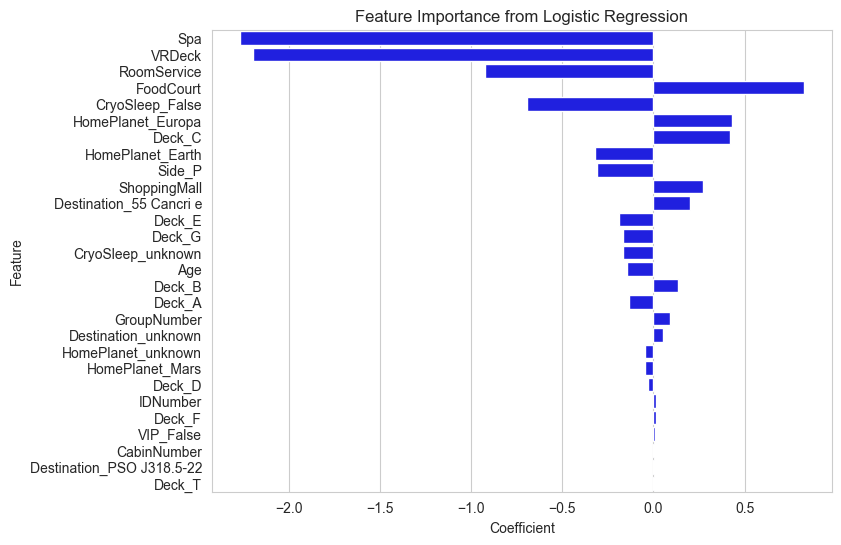

In [21]:
log1_coefficients = logreg1.coef_.flatten()
log1_feature_names = X1.columns
print(log1_coefficients)
print()
print(log1_feature_names)

log1_feature_importance_df = pd.DataFrame({'Feature':log1_feature_names, 'Coefficient':log1_coefficients})
log1_feature_importance_df = log1_feature_importance_df.reindex(log1_feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient',y='Feature',data=log1_feature_importance_df,color='b')
plt.title('Feature Importance from Logistic Regression')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.7745732783990583
Precision: 0.80078125
Recall: 0.727810650887574
F1-Score: 0.7625542467451953


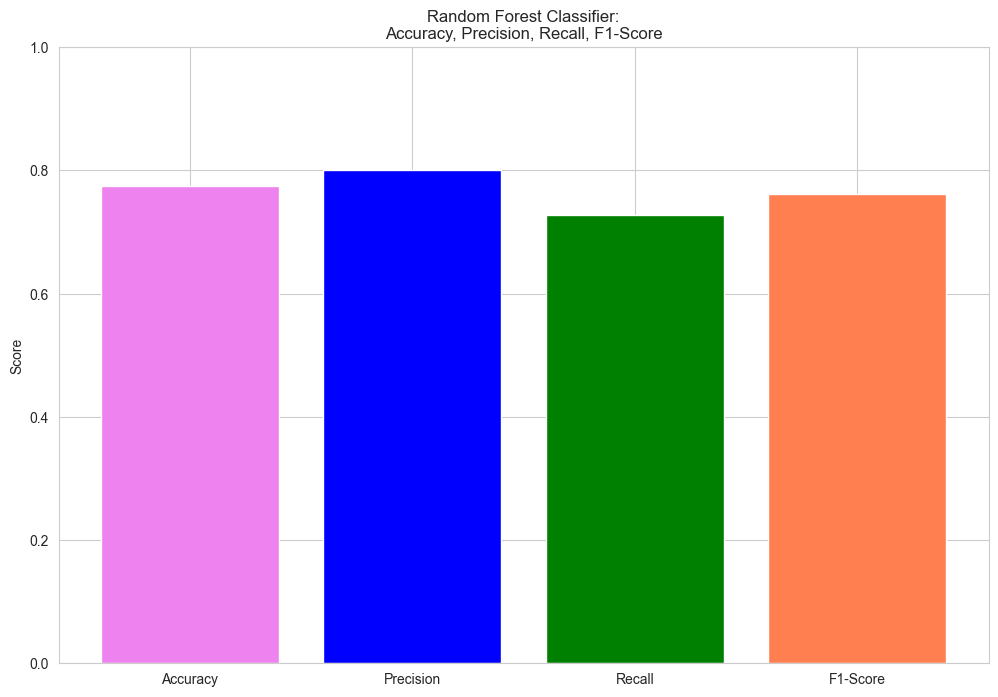

In [24]:
rfc = RandomForestClassifier(max_depth=20,n_estimators=6,random_state=818)
rfc.fit(X_train,y_train)

y_pred_rf = rfc.predict(X_test)

rf_accuracy = accuracy_score(y_test,y_pred_rf)
rf_precision = precision_score(y_test,y_pred_rf)
rf_recall = recall_score(y_test,y_pred_rf)
rf_f1 = f1_score(y_test,y_pred_rf)

print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-Score: {rf_f1}")

rf_metric = ['Accuracy','Precision','Recall','F1-Score']
rf_scores = [rf_accuracy,rf_precision,rf_recall,rf_f1]

plt.figure(figsize=(12,8))
plt.bar(rf_metric,rf_scores,color=['violet','blue','green','coral'])
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Random Forest Classifier:\nAccuracy, Precision, Recall, F1-Score')
plt.show()

In [26]:
X

,GroupNumber,IDNumber,CabinNumber,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_unknown,CryoSleep_False,CryoSleep_True,CryoSleep_unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_unknown,VIP_False,VIP_True,VIP_unknown,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,1,1,0,0.0,0.0,0.0,0.0,0.0,39.0,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,2,1,0,109.0,9.0,25.0,549.0,44.0,24.0,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True
2,3,1,0,43.0,3576.0,0.0,6715.0,49.0,58.0,False,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True
3,3,2,0,0.0,1283.0,371.0,3329.0,193.0,33.0,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True
4,4,1,1,303.0,70.0,151.0,565.0,2.0,16.0,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,1,98,0.0,6819.0,0.0,1643.0,74.0,41.0,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False
8689,9278,1,1499,0.0,0.0,0.0,0.0,0.0,18.0,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
8690,9279,1,1500,0.0,0.0,1872.0,1.0,0.0,26.0,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True
8691,9280,1,608,0.0,1049.0,0.0,353.0,3235.0,32.0,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True


Accuracy: 0.7710417892878164
Precision: 0.8170563961485557
Recall: 0.6988235294117647
F1-Score: 0.7533291058972733


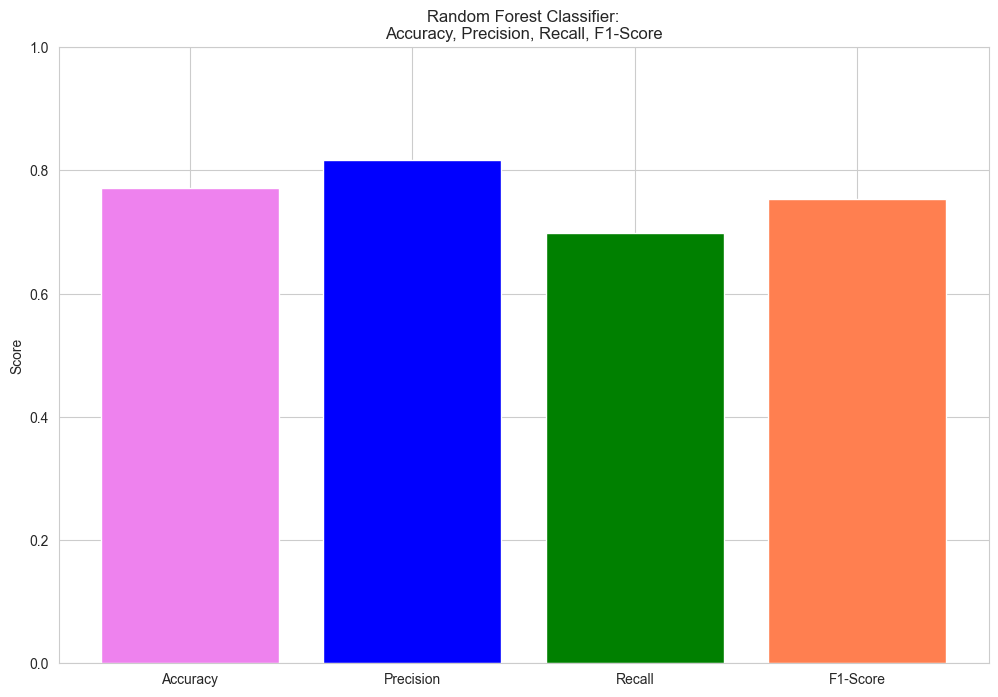

In [36]:
rfc1 = RandomForestClassifier(max_depth=20,n_estimators=6,random_state=818)
rfc1.fit(X1_train,y_train)

y_pred_rf1 = rfc1.predict(X1_test)

rf1_accuracy = accuracy_score(y_test,y_pred_rf1)
rf1_precision = precision_score(y_test,y_pred_rf1)
rf1_recall = recall_score(y_test,y_pred_rf1)
rf1_f1 = f1_score(y_test,y_pred_rf1)

print(f"Accuracy: {rf1_accuracy}")
print(f"Precision: {rf1_precision}")
print(f"Recall: {rf1_recall}")
print(f"F1-Score: {rf1_f1}")

rf1_metric = ['Accuracy','Precision','Recall','F1-Score']
rf1_scores = [rf1_accuracy,rf1_precision,rf1_recall,rf1_f1]

plt.figure(figsize=(12,8))
plt.bar(rf1_metric,rf1_scores,color=['violet','blue','green','coral'])
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Random Forest Classifier:\nAccuracy, Precision, Recall, F1-Score')
plt.show()

In [30]:
print(X1_train.shape)
print(X1_test.shape)

(6795, 28)
(1699, 28)


In [33]:
rfc1 = RandomForestClassifier(max_depth=20,n_estimators=6,random_state=831)
rfc1.fit(X1_train,y_train)

y_pred_rf1 = rfc.predict(X1_test)

ValueError: X has 28 features, but RandomForestClassifier is expecting 33 features as input.

c:\Users\uriah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

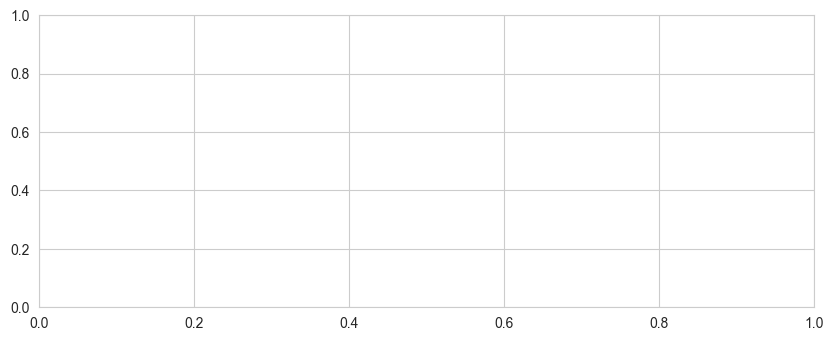

In [38]:
from sklearn.calibration import CalibrationDisplay
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from matplotlib.gridspec import GridSpec

class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

# Define the classifiers to be compared in the study.
#
# Note that we use a variant of the logistic regression model that can
# automatically tune its regularization parameter.
#
# For a fair comparison, we should run a hyper-parameter search for all the
# classifiers but we don't do it here for the sake of keeping the example code
# concise and fast to execute.
lr = LogisticRegressionCV(
    Cs=np.logspace(-6, 6, 101), cv=10, scoring="neg_log_loss", max_iter=1_000
)
gnb = GaussianNB()
svc = NaivelyCalibratedLinearSVC(C=1.0)
rfc = RandomForestClassifier(random_state=206)
boost = GradientBoostingClassifier(random_state=530)
xgb = XGBClassifier()

clf_list = [
    (lr, "Logistic Regression"),
    (gnb, "Naive Bayes"),
    (svc, "SVC"),
    (rfc, "Random forest"),
    (boost,"Gradient Boosting"),
    (xgb,'XGB Boosting')
]

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(5, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :3])
calibration_displays = {}
markers = ["^", "v", "s", "o","*","."]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X1_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X1_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1), (4,0), (4,1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()